#Exploring Positional Parameters versus Time
Let's investigate how the different parameters look as a function of time

In [1]:
import pandas as pd
import pickle
from taskcode import construct_timestamp

In [2]:
df = construct_timestamp.load_tasks()

76
1
2264
326
373
178
2980
1
2
2
44
5010
7345
5375
5050
5100
4478
3466
4945
1886
1421
6298
4460
108
6
78
214
229
17045
16786
4600
6925
2094
2135
1527
1579
1956
2377
663
1949
2225
1172
292
2188
63
2982
839
972
1454
2418
1698
1313
2423
147
2626
740
1743
1039
1978
1042
8
2459
2867
822
1014
2628
1355
1100
1212
3129
2502
3595
600
2365
2832
988
1231
556
3329
192
56
4667
24
519
2120
1698
1358
1744
1
827
700
2558
3008
646
2183
335
2731
2066
2989
2888
1545
1247
527
2201
1436
8
1891
92
2839
1294
818
1952
2401
210
1778
669
2516
2086
1322
567
1847
2800
515
686
2241
1074
2382
1858
840
2124
1532
1019
1249
2069
2144
1030
1671
2922
1756
1138
1336
1479
710
2900
1770
939
6550
289
340
2692
2459
1392
1870
1037
2297
6
1637
3777
9
10
1834
1516
1183
1168
1982
2000
1854
1271
1912
2163
540
922
2385
1499
3368
1278
3671
1373
3315
2473
1128
1786
3465
2197
4439
327
2055
394
2030
2667
553
1533
3030
2739
1495
1935
2175
2475
2907
605
2309
393
1702
2904
1225
1904
5373
195
198
3267
1624
4846
3916
1165
2574
4410
2112
71

In [11]:
names = ['position_x', 'position_y', 'distance', 'distance_x', 'distance_y',
            'velocity', 'velocity_x_rms', 'velocity_y_rms', 'velocity_x', 'velocity_y',
            'acceleration', 'acceleration_x_rms', 'acceleration_y_rms', 'acceleration_x', 'acceleration_y', 'float_time']
names_stds = []
for i in range(15):
    names_stds.append(names[i] + ' std')
names += names_stds
names
for k,name in enumerate(names):
    df[name] = map(list, df.iloc[:, (6 + 30*k):(6 + 30*(k+1))].values)
df

,end_time,label,name,room,skill,start_time,0,1,2,3,...,velocity std,velocity_x_rms std,velocity_y_rms std,velocity_x std,velocity_y std,acceleration std,acceleration_x_rms std,acceleration_y_rms std,acceleration_x std,acceleration_y std
0,2016-02-05 20:29:33.142156+00:00,9,Plumber 2,0,Plumber,2016-02-05 19:33:15.981844+00:00,7357.75,7399.05,7552,7424,...,"[153.524279484, 109.821521483, 155.672396741, ...","[79.0104209364, 68.4521017911, 129.569552869, ...","[143.259723478, 108.688972813, 123.076892911, ...","[91.3572403448, 91.6033938512, 147.346300428, ...","[161.138928835, 132.359569065, 149.201514758, ...","[179.483890697, 116.058213562, 174.466369893, ...","[88.8862106379, 80.2371120833, 149.946882474, ...","[178.586774535, 119.793978611, 143.141679145, ...","[112.642314026, 116.836821174, 182.299484316, ...","[214.370572916, 175.715592958, 202.057004556, ..."
1,2016-03-30 21:09:50.816095+00:00,6,Plumber 1,30,Plumber,2016-03-30 19:45:59.867041+00:00,-2697.33,-2635.2,-2674.98,-2661.69,...,"[500.043641101, 443.708385147, 464.877275533, ...","[524.426255231, 471.012737482, 489.382678683, ...","[124.766792627, 159.415656108, 141.578047941, ...","[893.398766471, 689.528246165, 762.530494547, ...","[201.941312726, 232.282547603, 204.290896297, ...","[787.750699948, 625.812033779, 695.953772448, ...","[820.961891108, 654.808122152, 728.851288708, ...","[191.909193411, 260.754021804, 218.351744925, ...","[1508.26866037, 1078.76157495, 1218.13788196, ...","[330.736768522, 380.896213454, 326.887466181, ..."
2,2016-03-30 21:09:50.816095+00:00,6,Plumber 1,30,Plumber,2016-03-30 19:45:59.867041+00:00,-2494.13,-2511.73,-2473.07,-2509.56,...,"[456.968053948, 529.527987883, 454.800748528, ...","[479.407468553, 563.060884205, 491.265098099, ...","[232.461804165, 186.263843, 177.433097123, 187...","[734.779188939, 817.705053673, 740.523314732, ...","[342.74963932, 293.195571143, 275.423585432, 2...","[729.169966873, 845.544079317, 705.252656509, ...","[752.283826712, 898.44939619, 775.542016405, 7...","[330.602217156, 285.642580187, 266.991576075, ...","[1227.24812552, 1324.51441011, 1217.62778352, ...","[533.217162489, 492.078244662, 456.257316635, ..."
3,2016-03-30 19:46:00.092206+00:00,6,Plumber 1,46,Plumber,2016-03-30 17:43:02.003126+00:00,-1678.67,-1488.53,-1409.33,-1486.93,...,"[482.09248124, 437.665052385, 345.570197871, 3...","[489.013008042, 443.161196776, 354.356365681, ...","[60.0468367099, 61.4968098938, 52.6658799913, ...","[671.764230903, 623.579809271, 446.144989227, ...","[88.3403792095, 86.8381441351, 74.3199374821, ...","[698.688352152, 626.555206428, 493.597818647, ...","[701.87522723, 629.397545321, 502.577420182, 6...","[93.2045756823, 93.5193626285, 75.7640106563, ...","[1098.15994019, 999.439752666, 691.463101213, ...","[144.973396862, 142.320653321, 116.276700961, ..."
4,2016-03-30 19:46:00.092206+00:00,6,Plumber 1,46,Plumber,2016-03-30 17:43:02.003126+00:00,-2823.2,-3050.13,-3169.07,-2612.53,...,"[408.618718163, 355.945630672, 526.407649216, ...","[432.717545954, 371.543635992, 543.19541697, 3...","[186.736710023, 91.8181450009, 131.899910692, ...","[686.089371721, 584.634528747, 765.05177994, 5...","[268.024250526, 160.819370899, 198.550407723, ...","[659.281931078, 618.237861304, 820.83575258, 5...","[690.543976189, 632.954210641, 843.402267788, ...","[281.022700492, 185.887445442, 187.73319209, 1...","[1083.43725881, 976.609756735, 1266.57433621, ...","[431.577864478, 284.399210151, 318.056357157, ..."
5,2016-03-30 19:46:00.092206+00:00,6,Plumber 1,46,Plumber,2016-03-30 17:43:02.003126+00:00,-1305.87,-1473.87,-1481.07,-1520.27,...,"[410.775327941, 366.670694165, 401.123023915, ...","[423.480333924, 374.122587843, 410.756964172, ...","[79.4626017995, 69.4930797677, 66.1224339478, ...","[560.41818123, 613.019718395, 579.04599507, 68...","[99.8327188421, 100.387858, 94.0744746446, 97....","[603.926176751, 605.5284725, 613.61710138, 655...","[617.399598645, 617.02929634, 624.929627677, 6...","[125.759774586, 117.61578

In [12]:
def single_vector_maker(name):
    answer = []
    for i in df[name]:
        answer += i
    return answer
def label_vector_maker():
    answer = []
    for i in df['label']:
        for t in range(30):
            answer.append(i)
    return answer
column_data = []
for name in names:
    column_data.append(single_vector_maker(name))

In [13]:
df2 = pd.DataFrame()
for i,name in enumerate(names):
    df2[name] = pd.Series(column_data[i])
df2['label'] = pd.Series(label_vector_maker())
df2 = df2.sort(columns = 'label', ascending = True)
df2['int_time'] = df2.float_time.astype(int)
df2.index = range(len(df2))
df2.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,position_x,position_y,distance,distance_x,distance_y,velocity,velocity_x_rms,velocity_y_rms,velocity_x,velocity_y,...,velocity_y_rms std,velocity_x std,velocity_y std,acceleration std,acceleration_x_rms std,acceleration_y_rms std,acceleration_x std,acceleration_y std,label,int_time
0,15508.945455,38085.527273,2287.826731,1296.957259,1802.057062,280.071883,123.200000,207.951515,11.200000,-32.339394,...,272.890573,239.241270,342.707901,251.416242,201.685744,215.596720,265.286672,307.150451,1,22
1,17757.714286,38617.142857,3089.885131,1934.296512,2035.439807,318.786858,194.428571,194.857143,-116.142857,76.571429,...,213.877401,307.179511,280.059660,240.408966,249.509441,138.105606,342.599020,208.697818,1,21
2,14888.615385,37108.000000,2413.599057,2081.352872,1114.516854,216.135447,177.323077,59.507692,93.015385,-19.815385,...,94.385397,293.743860,110.085670,175.539074,175.219653,94.056843,239.804730,124.381289,1,21
3,16322.036364,39180.218182,1632.463508,1184.074213,982.449847,155.480185,121.454545,49.454545,-67.927273,-26.763636,...,68.734006,239.564408,80.534778,209.211061,214.518601,58.875661,264.085753,83.671186,1,21
4,18517.793103,39851.310345,3049.585812,2149.641929,1710.386672,241.357579,99.034483,181.655172,39.448276,16.689655,...,313.298275,198.038732,362.560205,270.075317,204.438019,210.398395,247.430371,259.889101,1,21


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


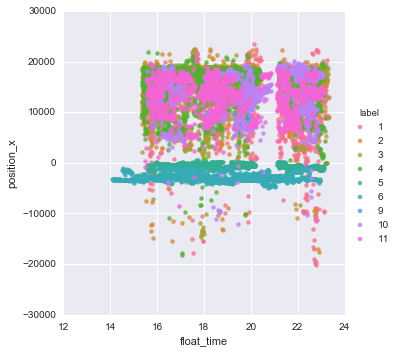

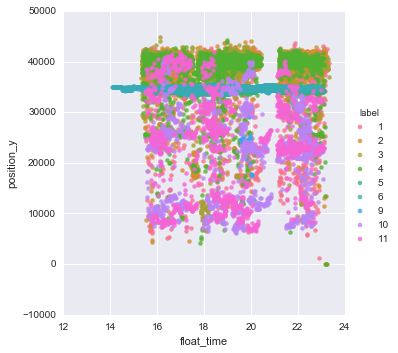

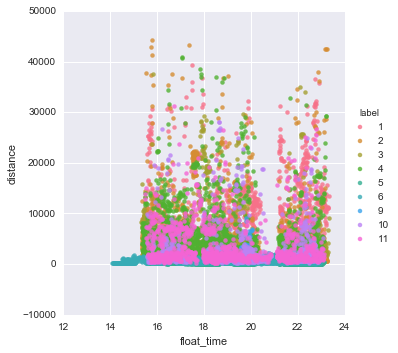

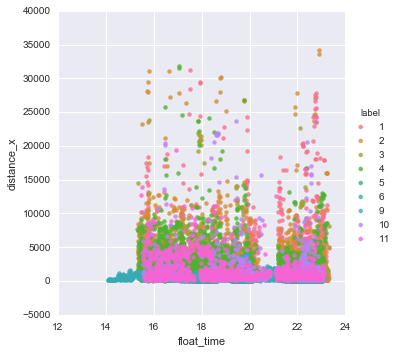

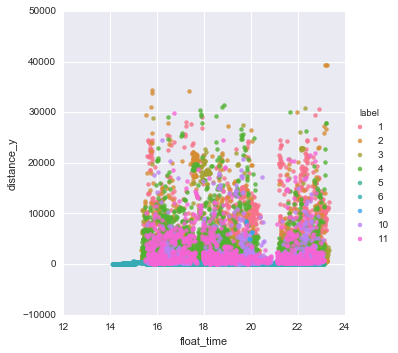

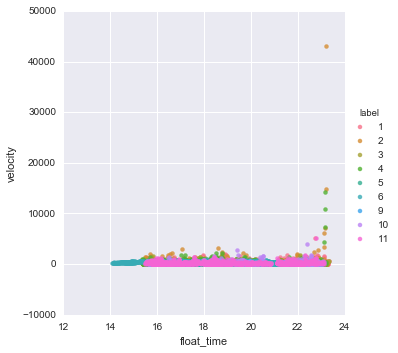

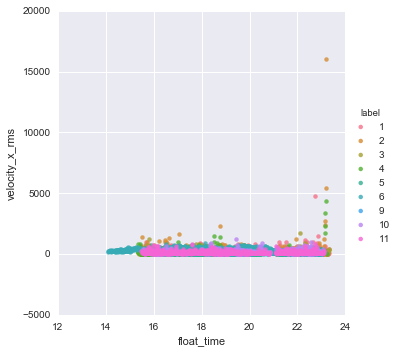

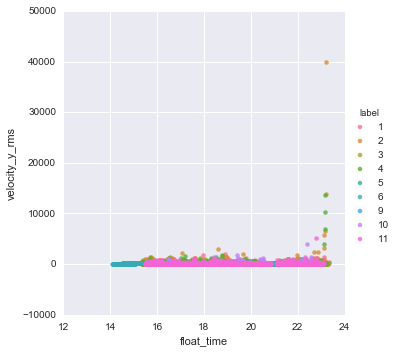

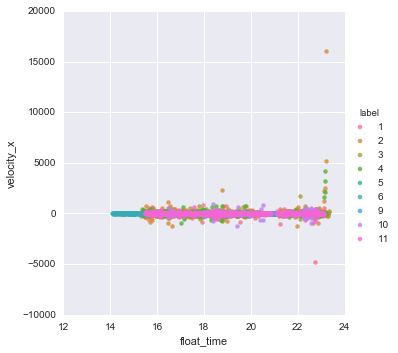

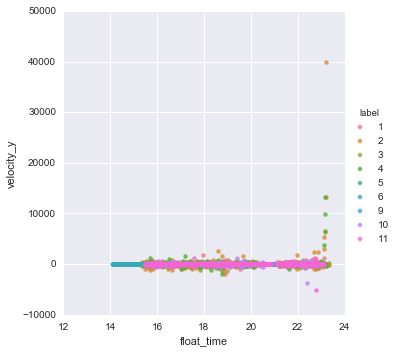

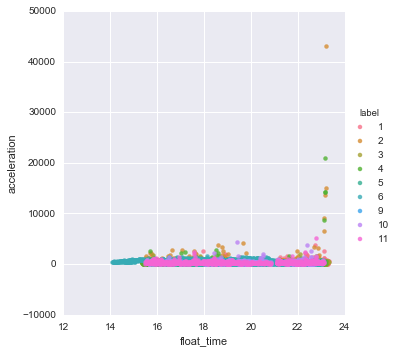

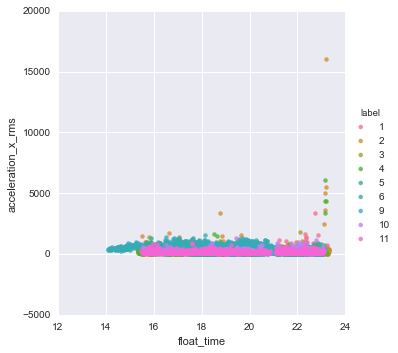

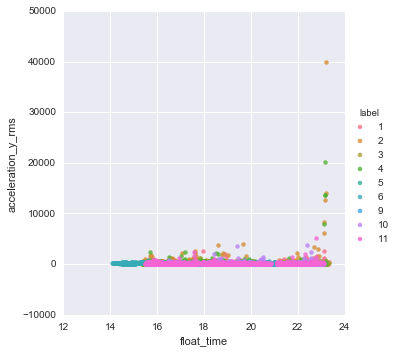

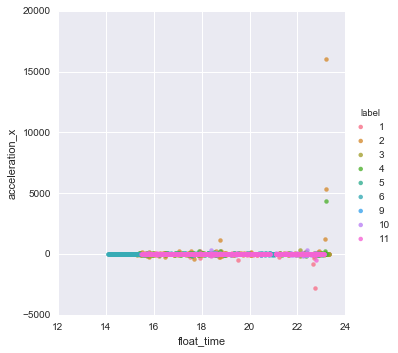

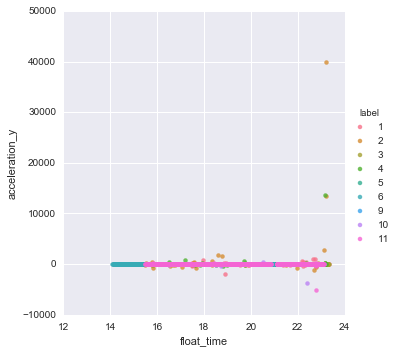

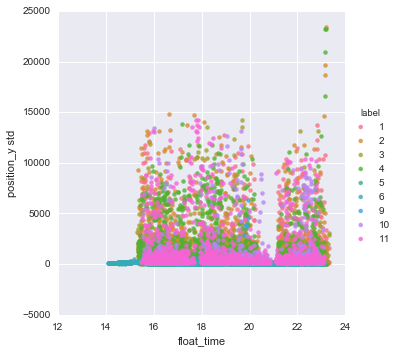

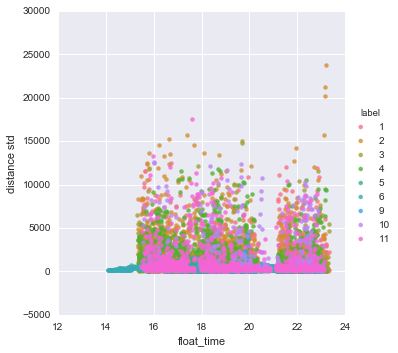

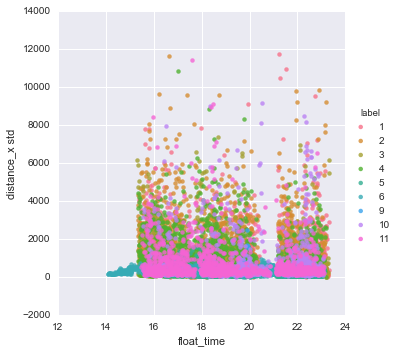

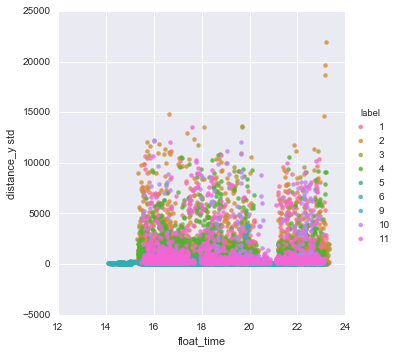

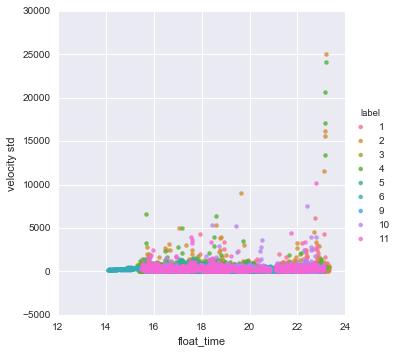

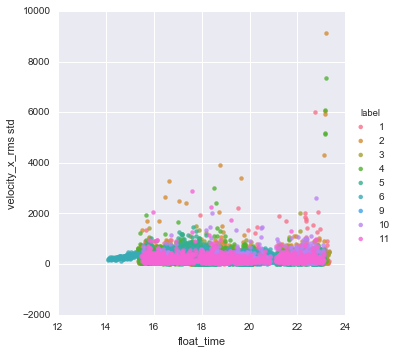

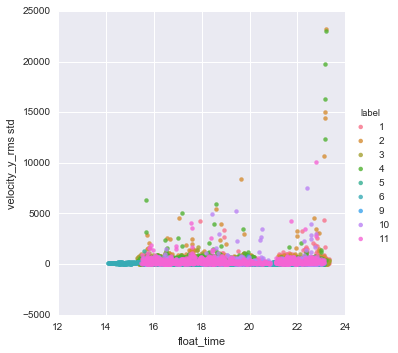

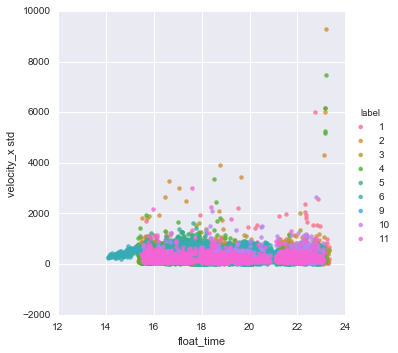

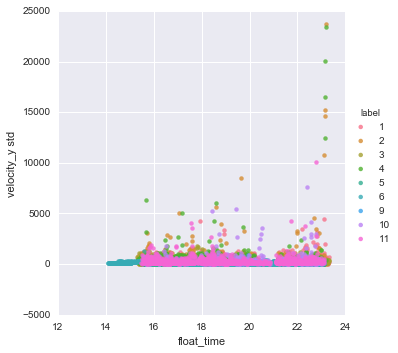

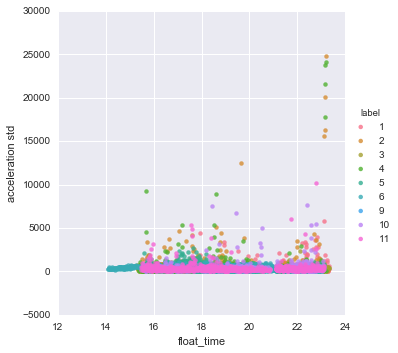

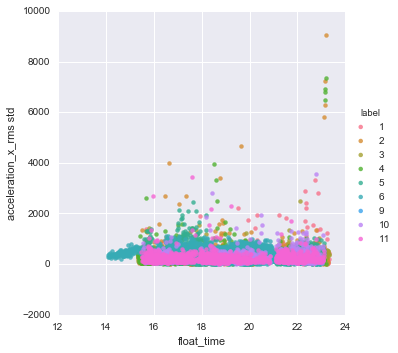

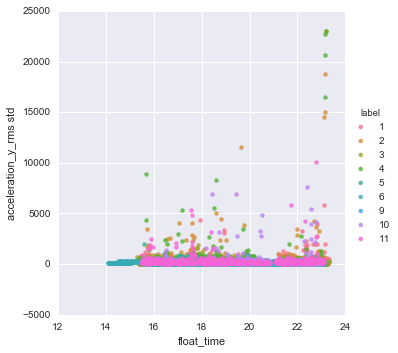

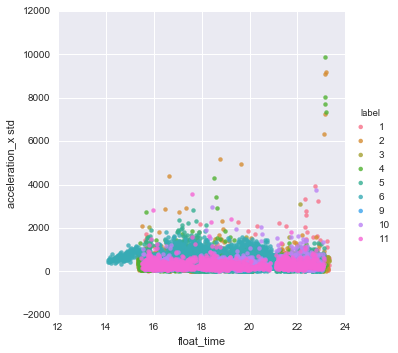

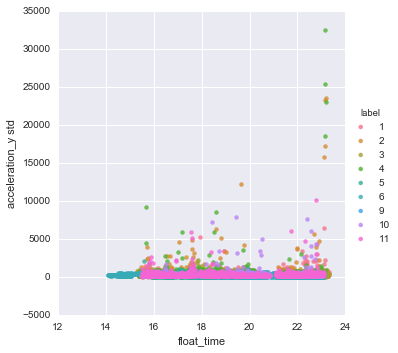

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_vars = names
del y_vars[15]
y_vars
for y in y_vars:
    sns.lmplot('float_time', y, data = df2, hue = 'label', fit_reg = False)

#Averaging Out the Data
The global scatter data do not reveal any obvious route to classification. Let's binning the data into 1 h intervals and averaging out for each parameter by task label.

In [16]:
df2['dummy_label'] = df2['label']
df2['dummy_int_time'] = df2['int_time']
df3 = df2.groupby(['dummy_label', 'dummy_int_time']).mean()

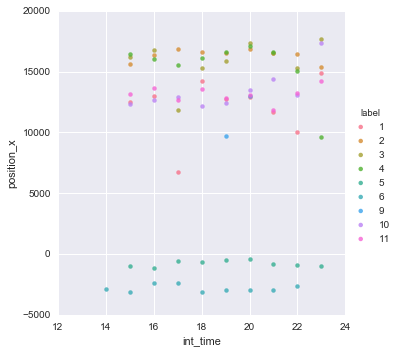

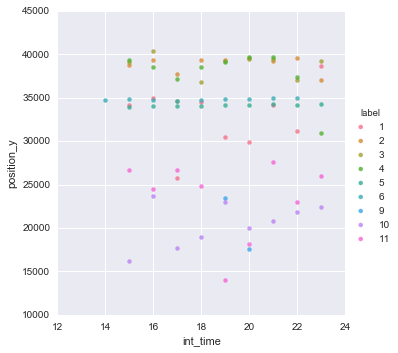

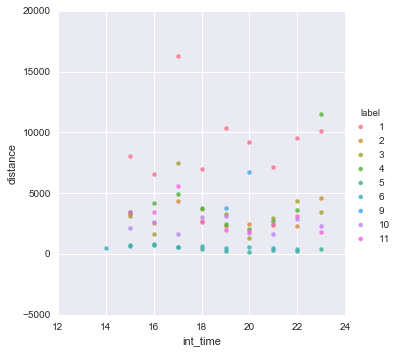

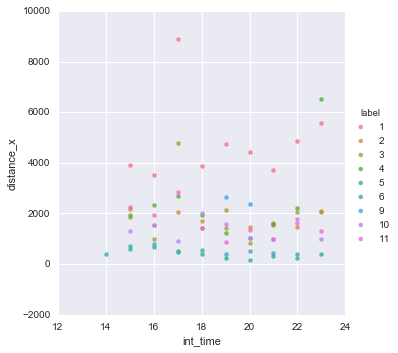

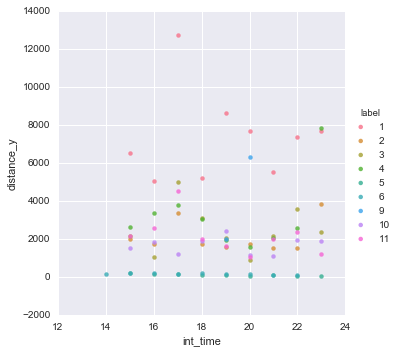

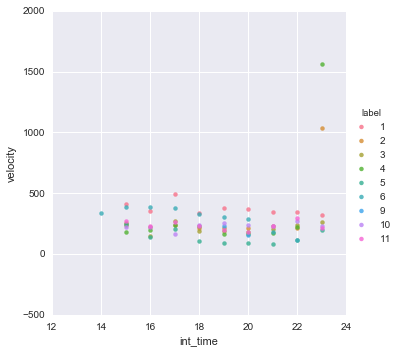

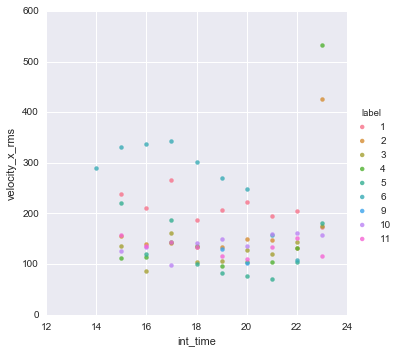

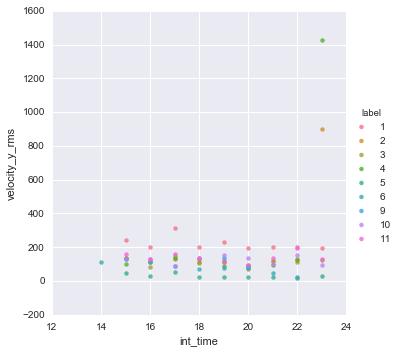

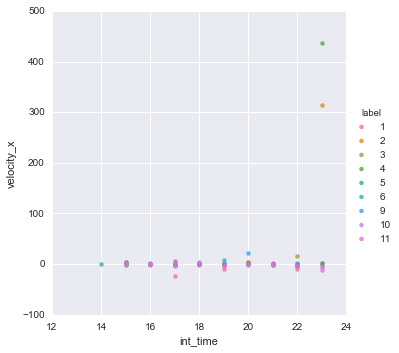

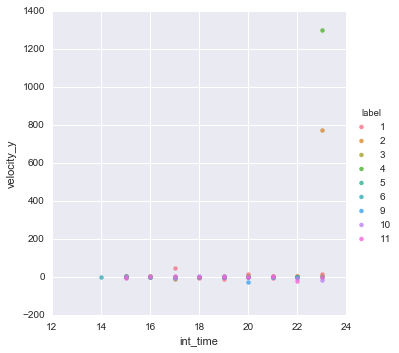

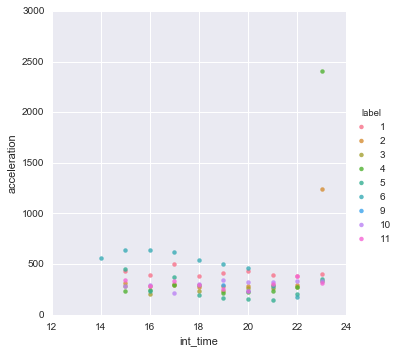

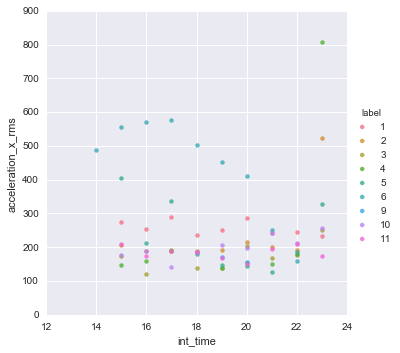

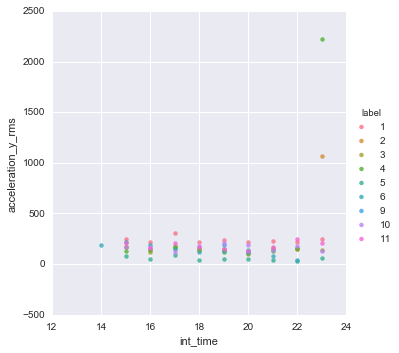

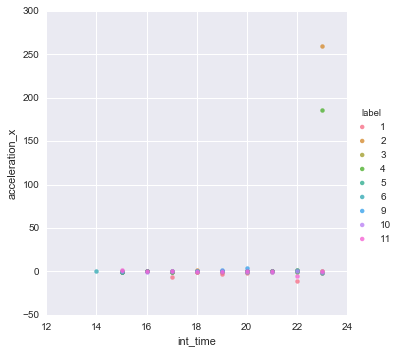

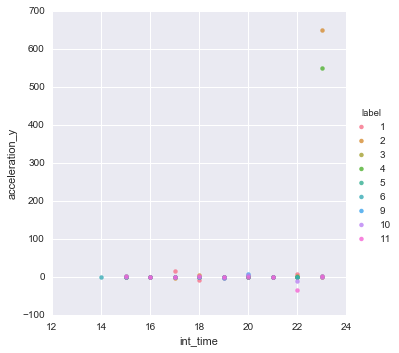

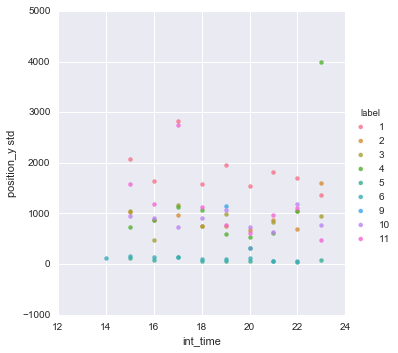

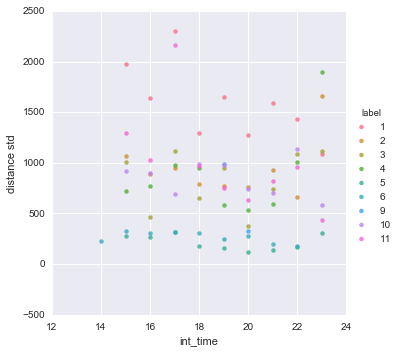

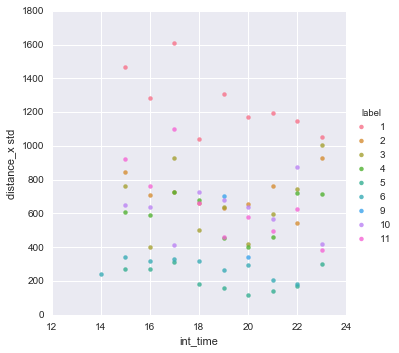

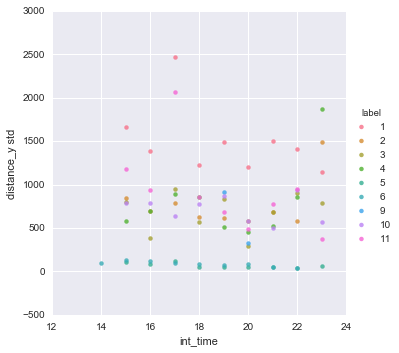

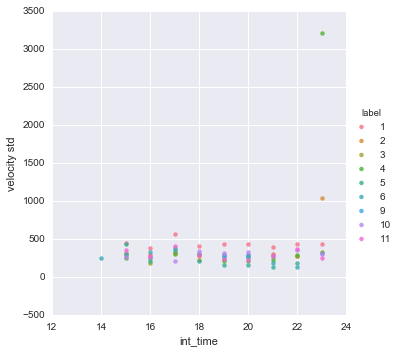

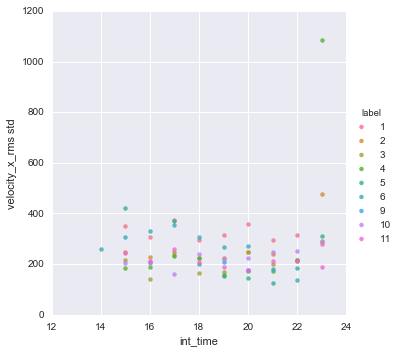

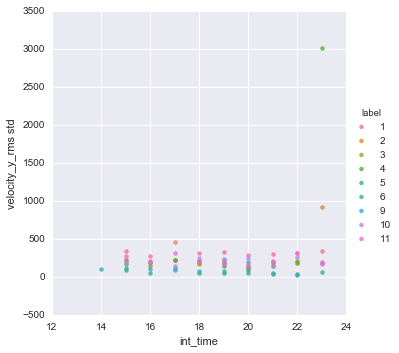

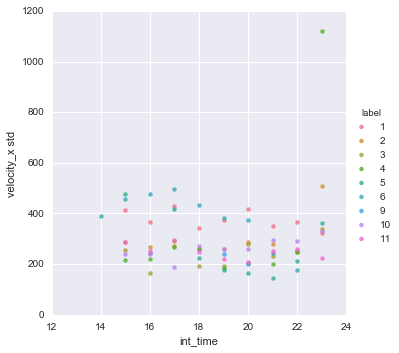

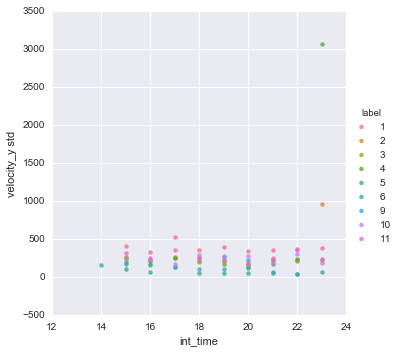

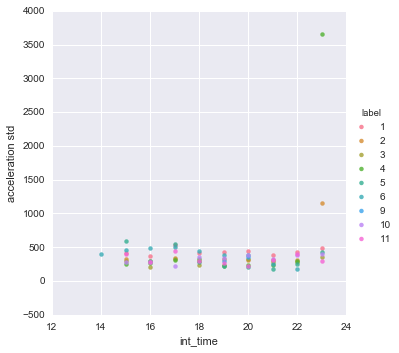

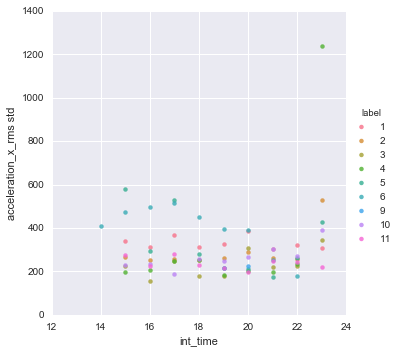

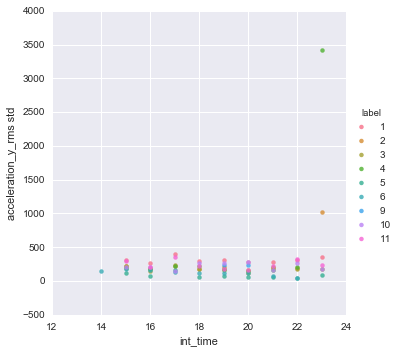

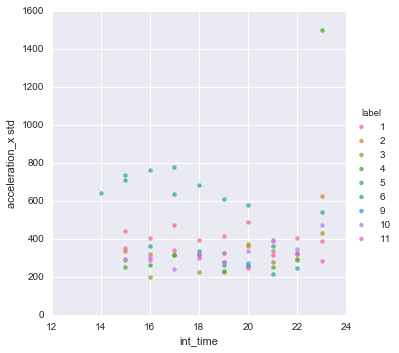

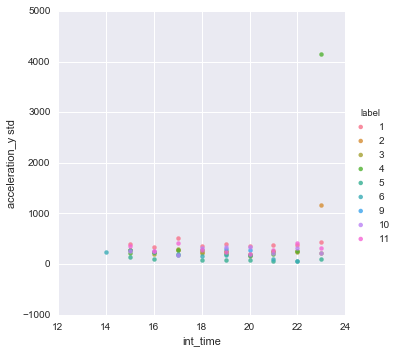

In [17]:
for y in y_vars:
    sns.lmplot('int_time', y, data = df3, hue = 'label', fit_reg = False)

#Standard Deviations
How do these look?

In [18]:
df4 = df2.groupby(['dummy_label', 'dummy_int_time']).std()
df4['label'] = df3['label']
df4['int_time'] = df3['int_time']

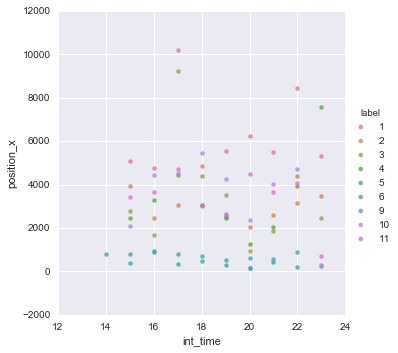

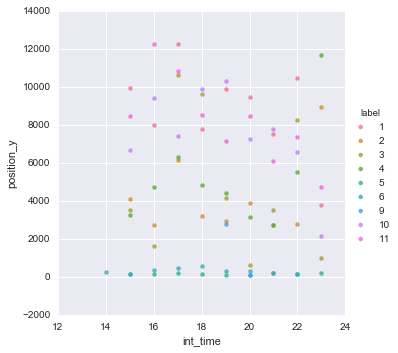

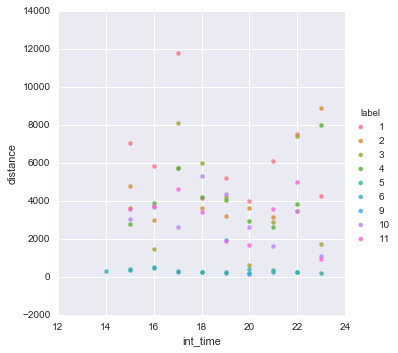

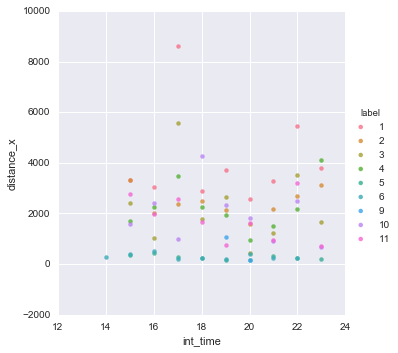

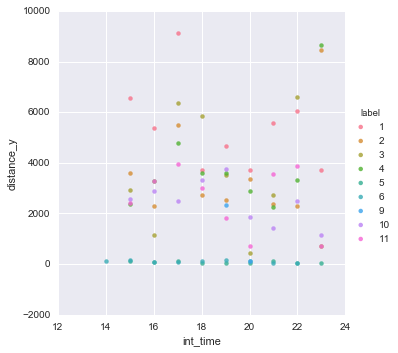

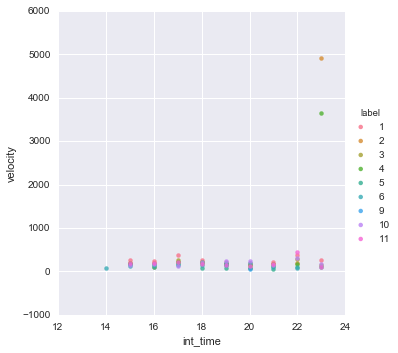

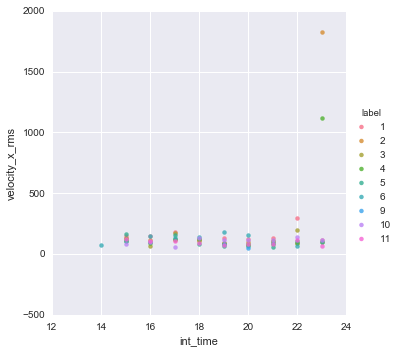

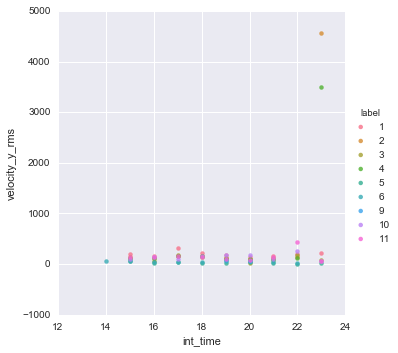

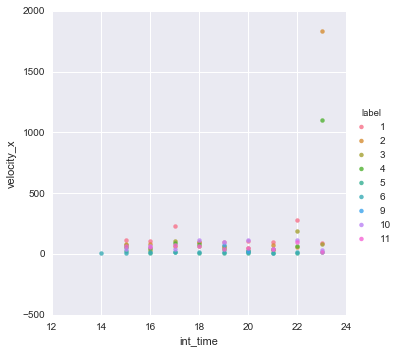

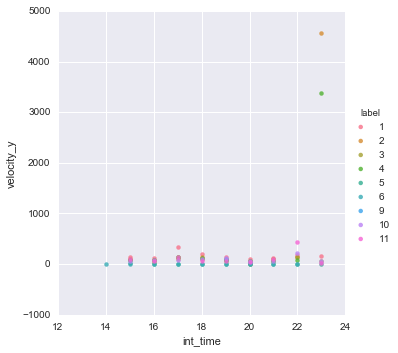

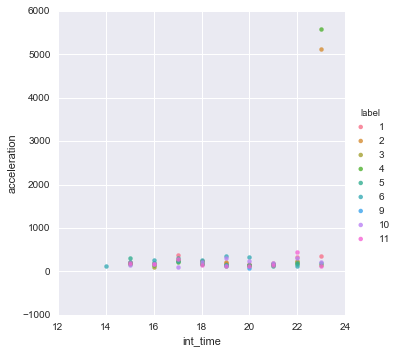

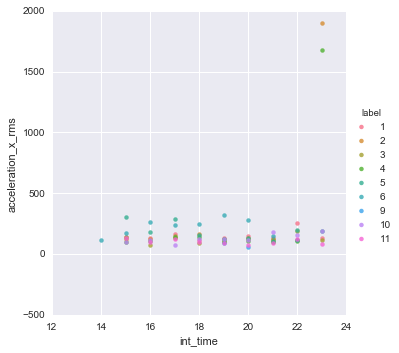

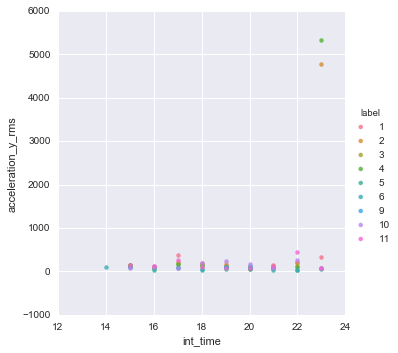

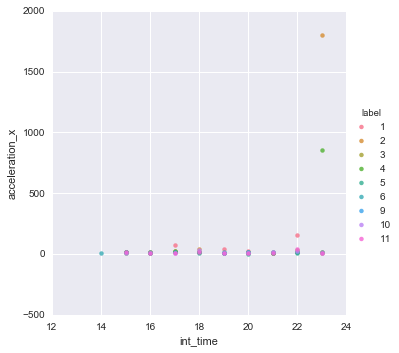

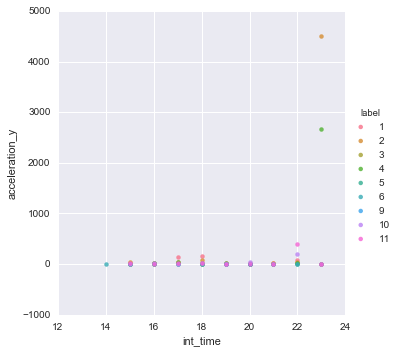

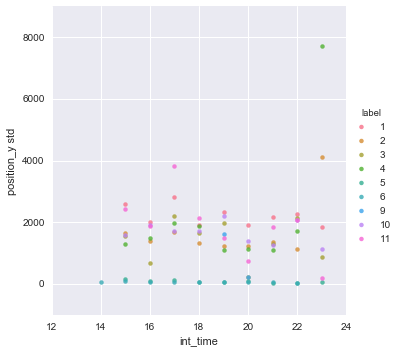

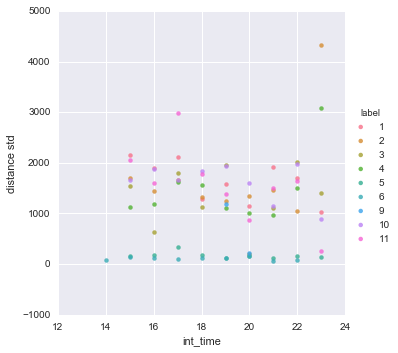

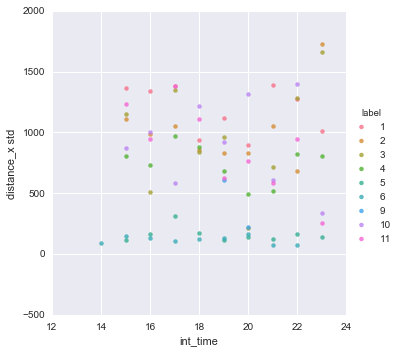

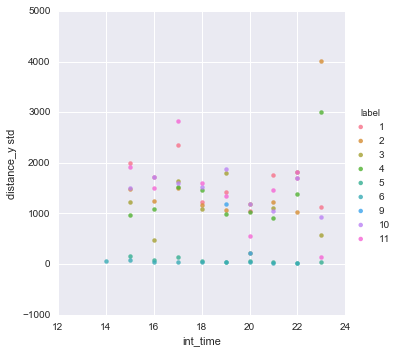

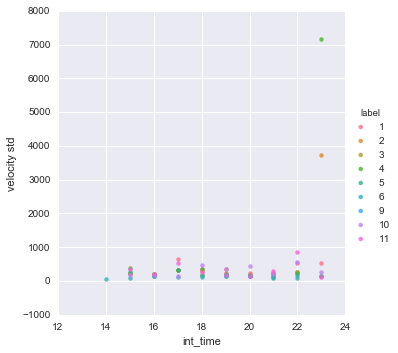

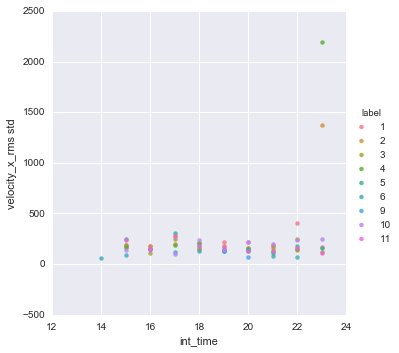

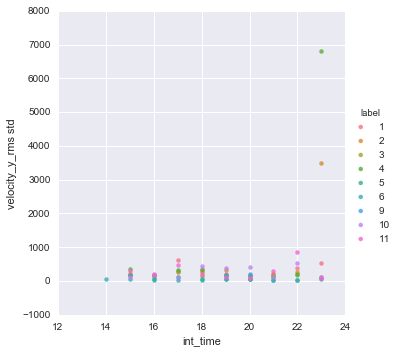

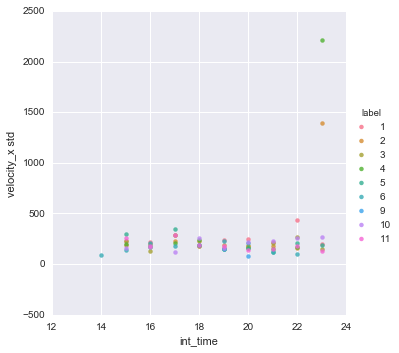

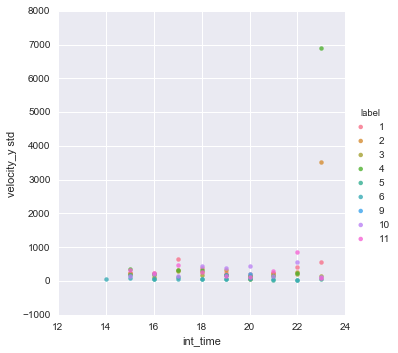

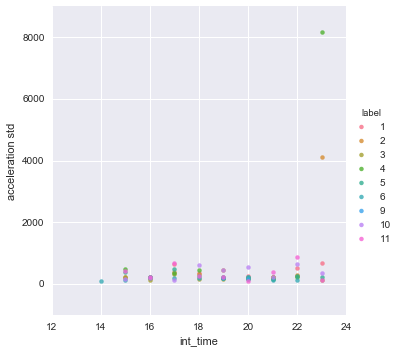

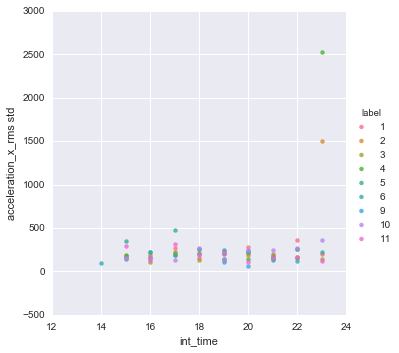

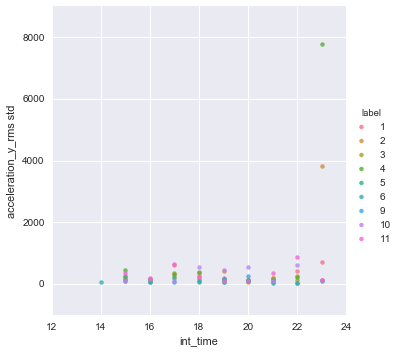

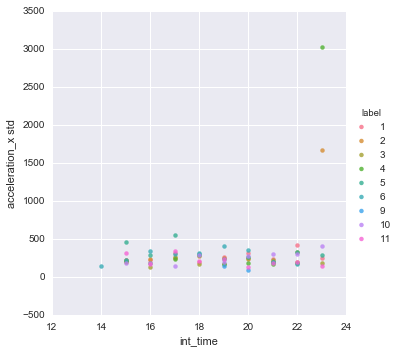

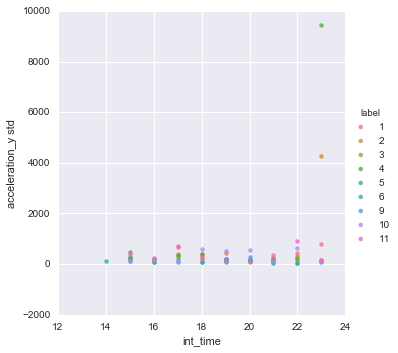

In [21]:
for y in y_vars:
    sns.lmplot('int_time', y, data = df4, hue = 'label', fit_reg = False)